In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import re

In [3]:
from io import StringIO
from os import listdir
from os.path import isfile

exclude = ["Мужчина в самом расцвете сил.txt", "заметки.txt"]
thefiles = [f for f in listdir('.') if isfile(f) and f.endswith(".txt") and f not in exclude]

In [10]:
def name():
    plt.xlabel("Угол, °")
    plt.ylabel("Напряжение, мВ")
    plt.xticks(np.arange(0, 361, 30), minor=True)
    plt.xticks(np.arange(0, 361, 90))

I'm going home to sauber.txt
Kickoo_1.txt
Kickoo_2.txt
Это настоящая проверка на прочность .txt


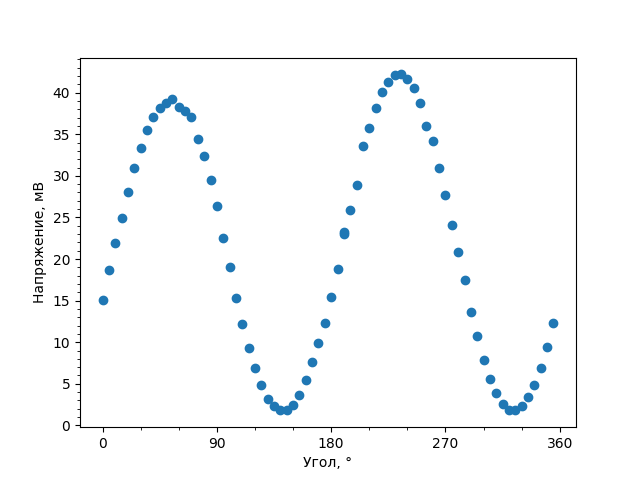

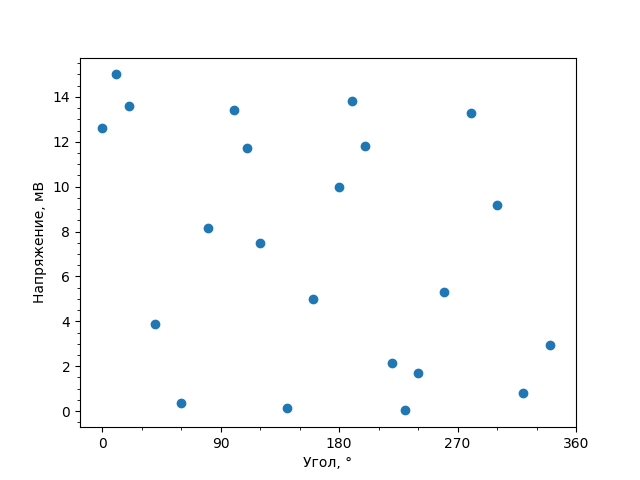

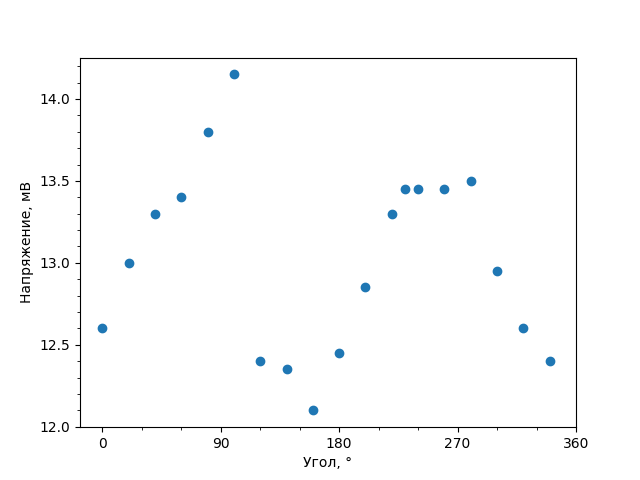

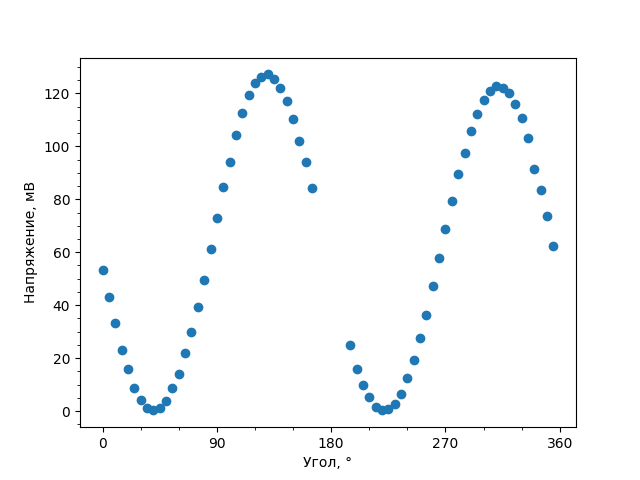

In [44]:
all_the_data = {}
%matplotlib widget
for f in thefiles:
    print(f)
    text = open(f, encoding="utf-8").read()
    df = pd.read_csv(StringIO(text), delimiter=" ", comment="#", header=None)
    all_the_data[f] = df
    fig, ax = plt.subplots(1, 1)
    #ax.set_title(f[:-4])
    ax.minorticks_on()
    ax.scatter(df[0], df[1])
    ax.set_xlabel("λ, нм")
    name()
    fig.savefig(f[:-4] + '.jpg', dpi=100)
    # fig.show()

In [12]:
from scipy.optimize import curve_fit

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


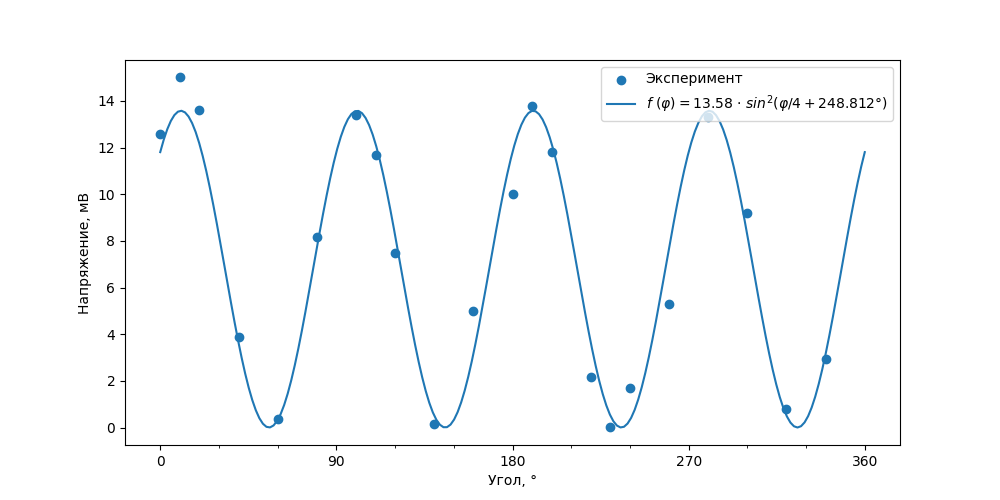

In [45]:
x = all_the_data["Kickoo_1.txt"][0]
y = all_the_data["Kickoo_1.txt"][1]
f = lambda x, A, φ: A*np.sin(x/180*np.pi*2 + φ)**2
res, err = curve_fit(f, x, y)
A, φ = res 

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Эксперимент")
X = np.linspace(0, 360, 200)
name()
plt.plot(X, f(X, *res), label=f"$f\ (φ)={round(A, 2)}\ ⋅\ sin^2(φ/4 + {round(φ*180/np.pi, 3)}°)$")

plt.legend(loc=1)
plt.savefig("approx_kickoo_1.png")

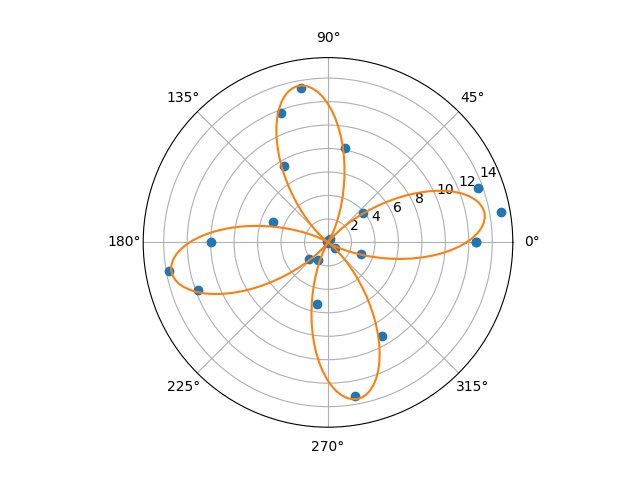

In [46]:
plt.figure()
x = list(x) + [x[0]]
y = list(y) + [y[0]]
plt.polar(np.array(x)/180*np.pi, y, "o")
plt.polar(X/180*np.pi, f(X, *res))
plt.savefig("round_approx_kickoo_1.png")
plt.show()

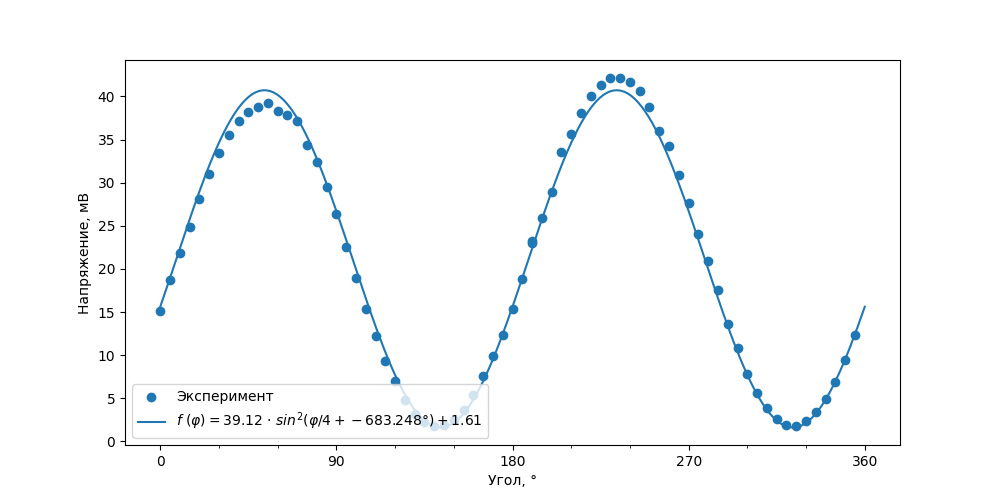

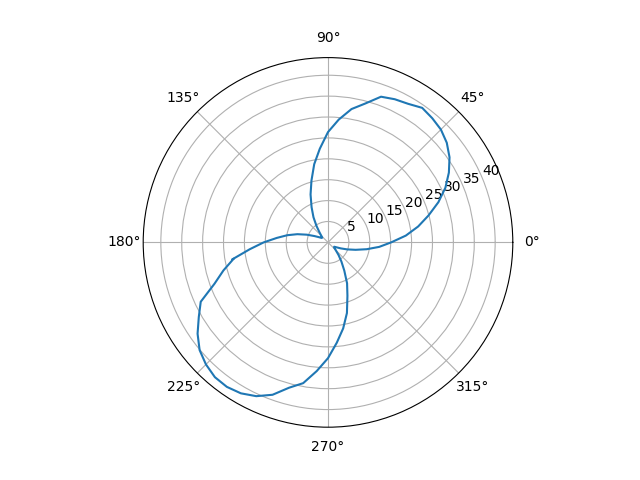

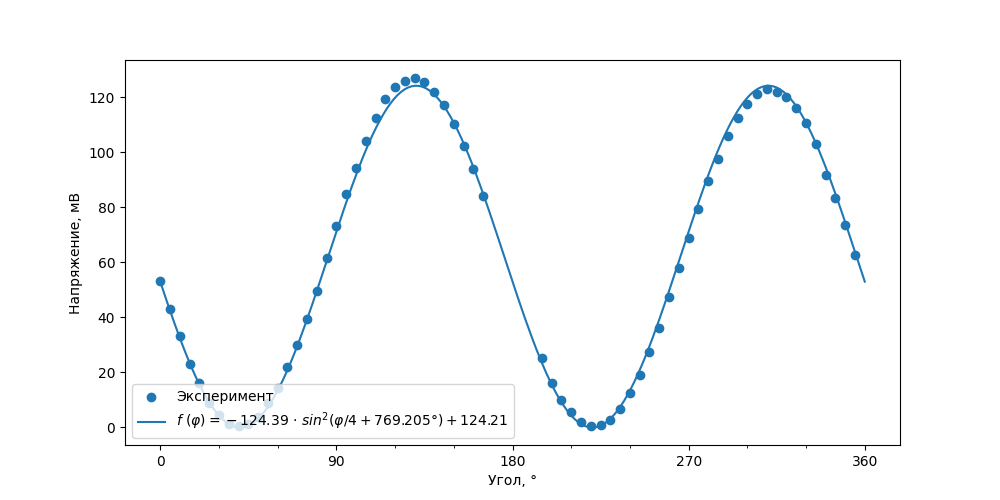

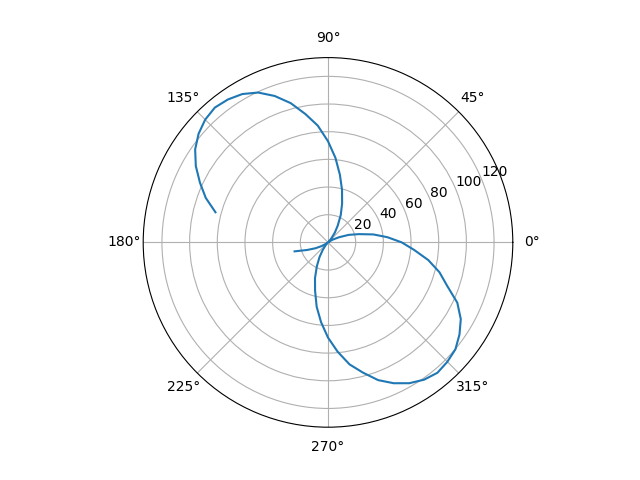

In [56]:

for f_name in ("I'm going home to sauber.txt", "Это настоящая проверка на прочность .txt"):
    x = all_the_data[f_name][0]
    y = all_the_data[f_name][1]

    f = lambda x, A, φ, c: A*np.sin(x/180*np.pi + φ)**2 + c
    res, err = curve_fit(f, x, y)
    A, φ, c = res

    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label="Эксперимент")
    name()
    X = np.linspace(0, 360, 200)
    plt.plot(X, f(X, *res), label=f"$f\ (φ)={round(A, 2)}\ ⋅\ sin^2(φ/4 + {round(φ*180/np.pi, 3)}°) + {round(c, 2)}$")

    plt.legend(loc=3)
    
    plt.savefig(f"{f_name}_lin_approx.png")
    
    plt.show()
    plt.figure()
    plt.polar(x/180*np.pi, y)
    
    plt.savefig(f"{f_name}_polar.png")
    
    plt.show()

In [6]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


TypeError: 'function' object is not subscriptable